{'global': array([30,  4,  4,  4,  4,  4]), 'difference_zero': array([ 5,  4,  5, 28,  4,  4]), 'local': array([ 8,  8,  8,  8,  8, 10])}


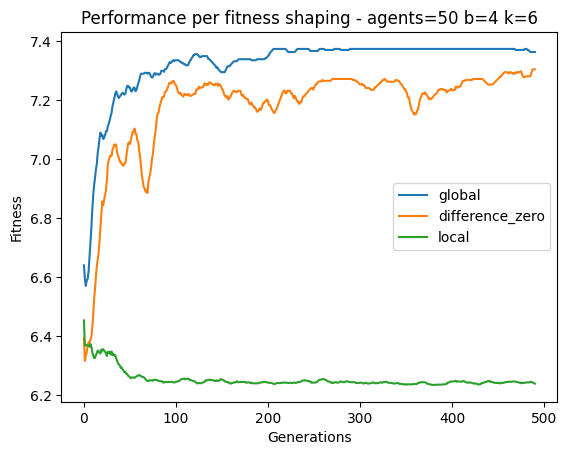

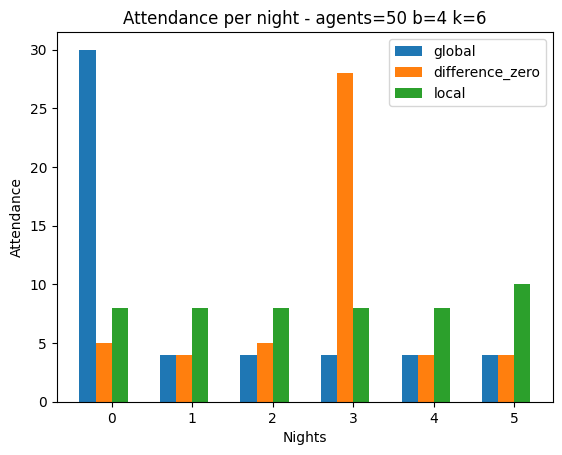

In [1]:
import matplotlib.pyplot as plt
from bar_problem import ccea
import numpy as np

fitness_shaping_types = ["global", "difference_zero", "local"]
weeks = 500
subpopulation_size = 20

n_agents = 50
optimal_atten = 4
n_nights = 6

performance_dict = {}
best_team_attendance_per_night = {}

for fitness_shaping in fitness_shaping_types:
    performance, best_team = ccea(
        fitness_shaping,
        weeks,
        optimal_atten,
        n_nights,
        n_agents,
        subpopulation_size,
    )

    performance_dict[fitness_shaping] = performance

    selected_nights = np.array(
        [agent.choose_night() for agent in best_team.individuals]
    )
    best_team_attendance_per_night[fitness_shaping] = np.sum(selected_nights, axis=0)

w = 10
performance_fig = plt.figure(0)
perf_fig = performance_fig.add_subplot(111)
for fitness_shaping in fitness_shaping_types:
    avg_performance = (
        np.convolve(performance_dict[fitness_shaping], np.ones(w), "valid") / w
    )
    perf_fig.plot(avg_performance)

# perf_fig.set_xticks(range(0, avg_performance.size))
perf_fig.legend(fitness_shaping_types)
perf_fig.set_title(
    f"Performance per fitness shaping - agents={n_agents} b={optimal_atten} k={n_nights}"
)
perf_fig.set_ylabel("Fitness")
perf_fig.set_xlabel("Generations")

bar_fig = plt.figure(1)
att_fig = bar_fig.add_subplot()
nights = [f"{i}" for i in range(n_nights)]
width = 0.20
for i, fitness_shaping in enumerate(fitness_shaping_types):

    att_fig.bar(
        np.arange(n_nights) + width * i,
        best_team_attendance_per_night[fitness_shaping],
        width,
    )

att_fig.set_xticks(np.arange(n_nights) + width + 0.1, nights)
att_fig.legend(fitness_shaping_types)
att_fig.set_ylabel("Attendance")
att_fig.set_xlabel("Nights")
att_fig.set_title(
    f"Attendance per night - agents={n_agents} b={optimal_atten} k={n_nights}"
)

print(best_team_attendance_per_night)

plt.show()
